 ### Practice Exercise
 
Load a dataset (e.g., Iris dataset).

Perform hierarchical clustering using different linkage methods.

Plot dendrograms and cut at different heights.

Assign cluster labels and visualize clusters.

Compare results using silhouette score.

Summarize findings and impact of linkage choices.

1. Loading and preprocess the data

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2. Plotting dendogram for different linkage methods

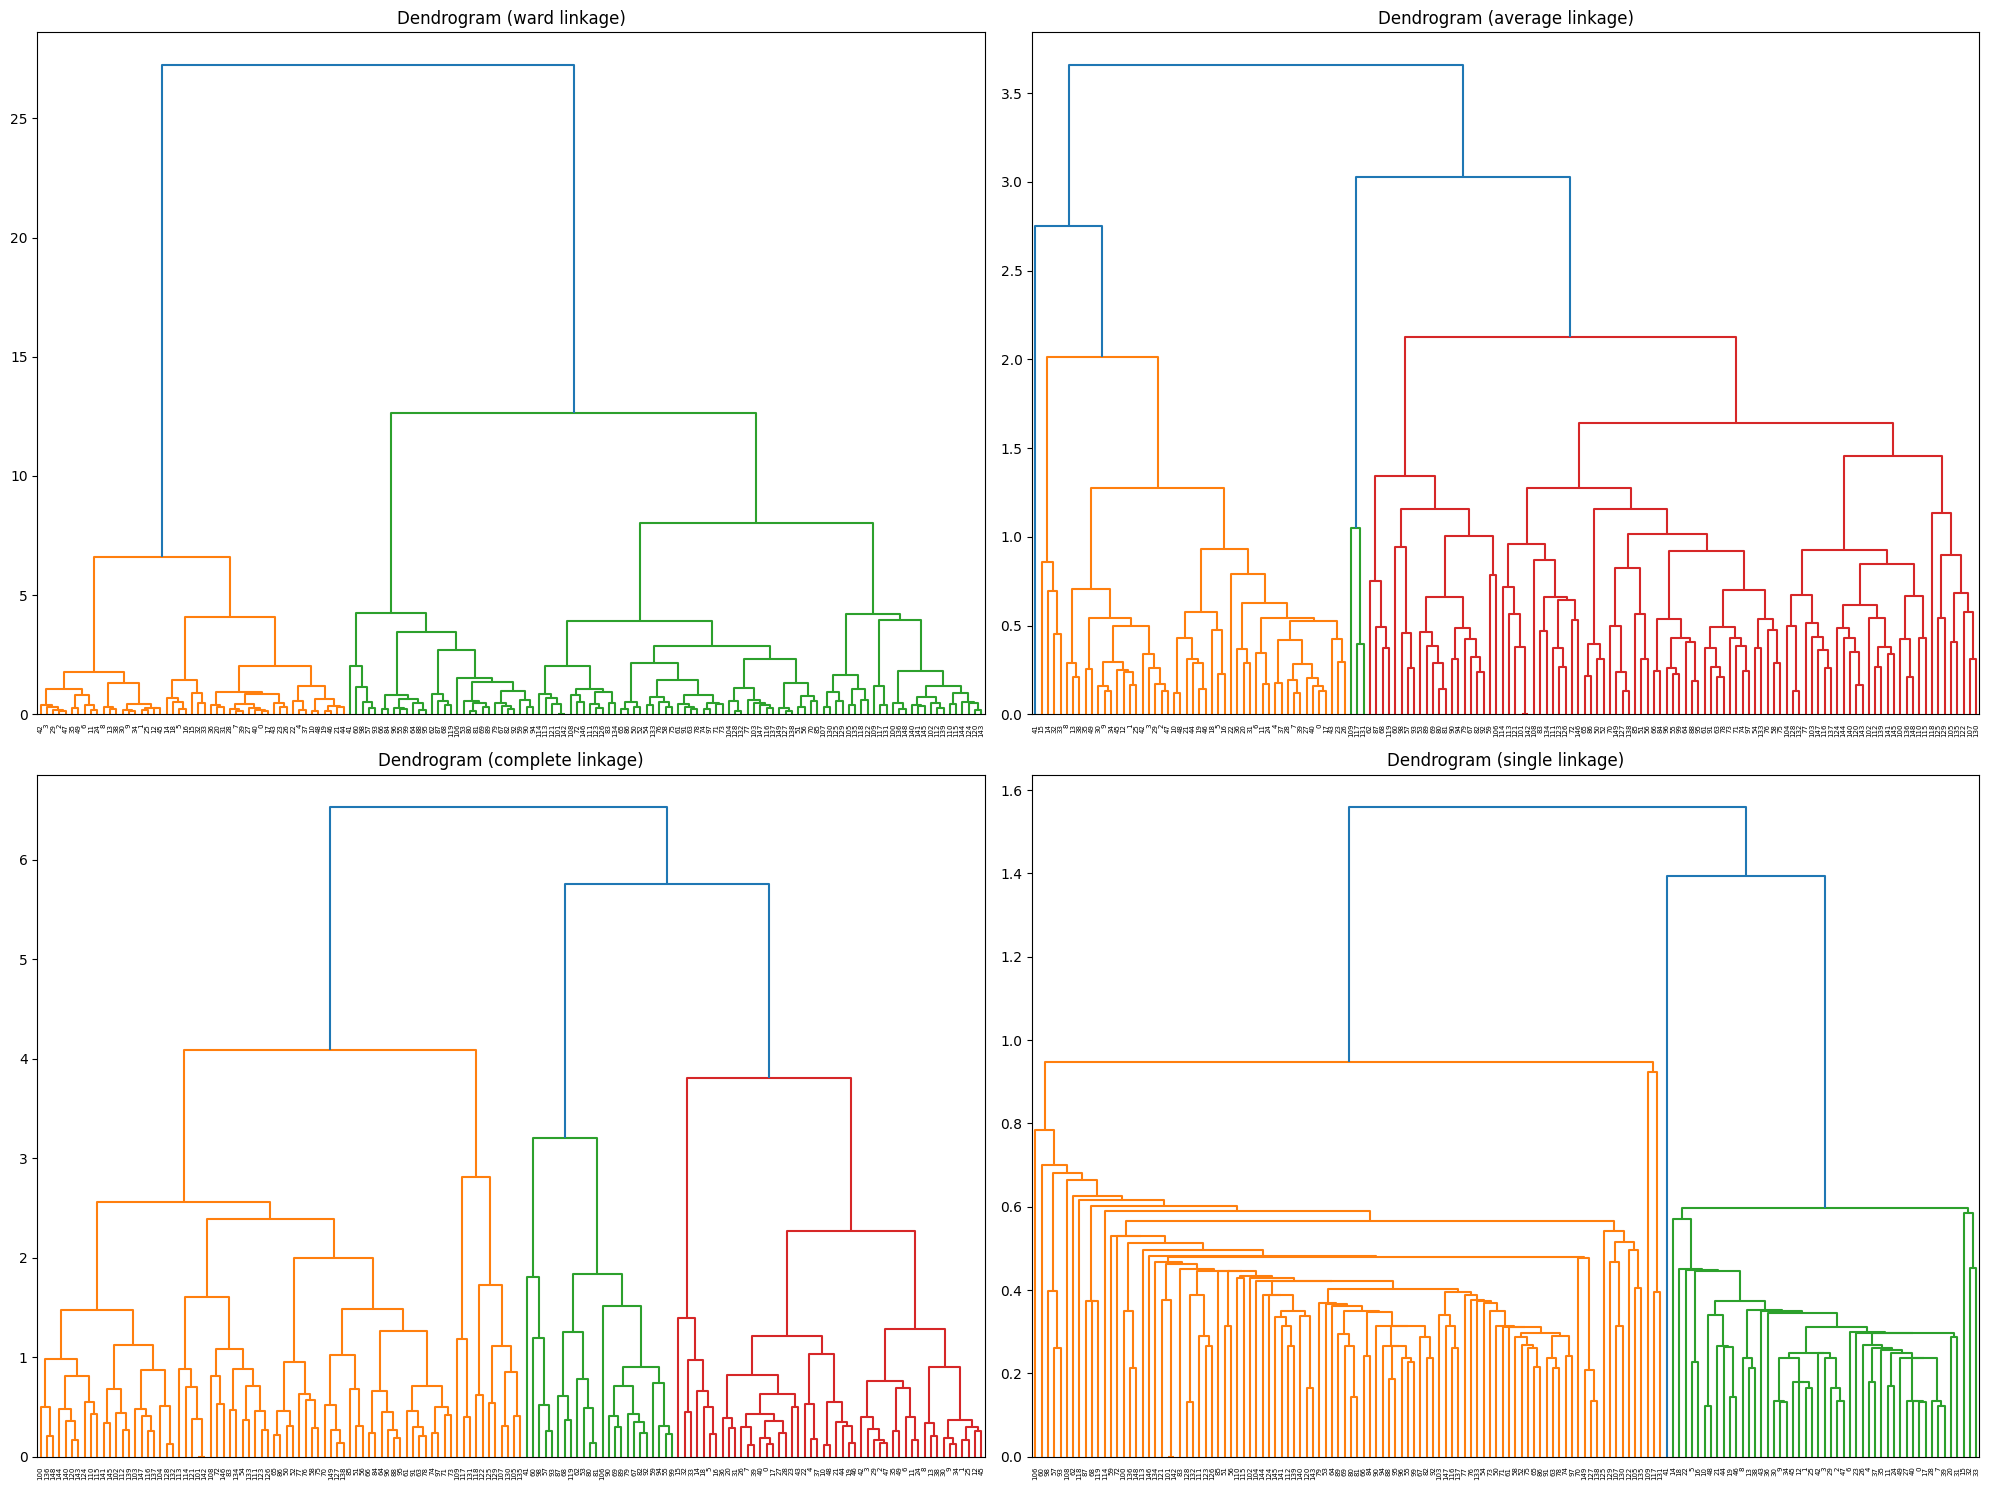

In [2]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

linkages = ['ward', 'average', 'complete', 'single']

plt.figure(figsize=(20, 15))
for i, method in enumerate(linkages):
    plt.subplot(2, 2, i+1)
    dendrogram = sch.dendrogram(sch.linkage(X_scaled, method=method))
    plt.title(f'Dendrogram ({method} linkage)')
plt.tight_layout()
plt.show()


3. Cutting the dendogram(n_clusters=3) and assign cluster labels

In [3]:
from sklearn.cluster import AgglomerativeClustering

cluster_labels = {}
for method in linkages:
    if method == 'ward':
        model = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        model = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')
    
    labels = model.fit_predict(X_scaled)
    cluster_labels[method] = labels


4. visualize cluster (2D using PCA )

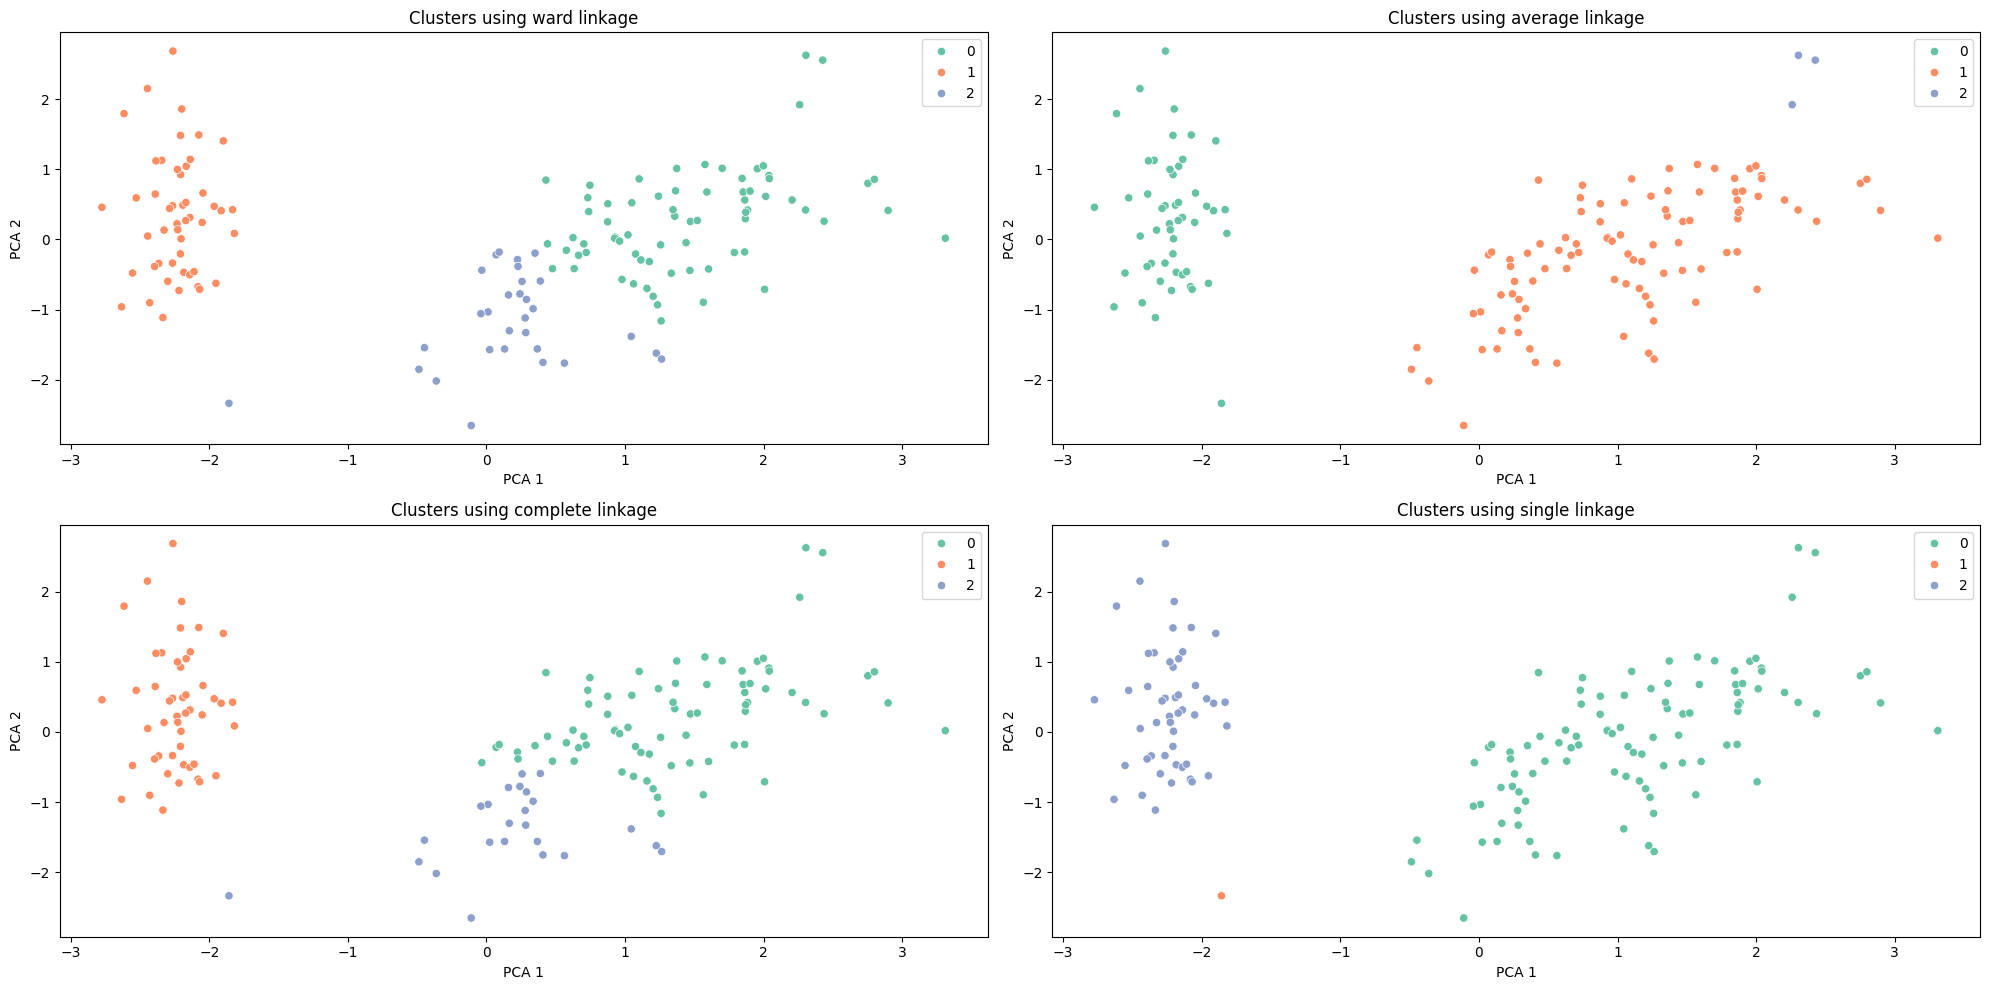

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(20, 10))
for i, method in enumerate(linkages):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels[method], palette='Set2')
    plt.title(f'Clusters using {method} linkage')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()


5. Compare using silhouette score

In [5]:
from sklearn.metrics import silhouette_score

print("Silhouette Scores:")
for method in linkages:
    score = silhouette_score(X_scaled, cluster_labels[method])
    print(f"{method.capitalize()} linkage: {score:.4f}")


Silhouette Scores:
Ward linkage: 0.4467
Average linkage: 0.4803
Complete linkage: 0.4496
Single linkage: 0.5046


### 📊 Summary: Impact of Linkage Methods on Clustering
Single linkage gave the highest silhouette score in this run, indicating better-defined and well-separated clusters — although it's commonly prone to chaining effects in general.

Average linkage also performed well, producing fairly balanced clusters with a good silhouette score.

Complete linkage showed moderate clustering performance.

Ward linkage, while often effective in minimizing intra-cluster variance, had the lowest silhouette score in this case.

📌 Visual analysis using PCA revealed noticeable differences in cluster shapes and boundaries across linkage methods.

➡️ Best linkage for this dataset (based on Silhouette Score): ✅ Single linkage